<a href="https://colab.research.google.com/github/swapnil-vyom/ML_learn/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
quantbruce_real_estate_price_prediction_path = kagglehub.dataset_download('quantbruce/real-estate-price-prediction')

print('Data source import complete.')


# **Polynomial Regression**

# **Review**

**It is better to see the results of Linear Regression on this Dataset first. To do this, I invite you to refer to my previous notebook about [Linear Regression](https://www.kaggle.com/aminizahra/linear-regression) .**



* we just completed a Linear Regression task, allowing us to predict future label values given a set of features!


* How can we now improve on a Linear Regression model?


* One approach is to consider **higher order relationships** on the features.


* There are two issues polynomial Regression will address for us:
  * Non-linear feature relationships to label

  * Interaction terms between features
  

* Let's first explore non-linear relationships and how considering polynomial orders could help address this.


* Imagine a feature that is not linear:
<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/1_eqiy.jpg" border="0" alt="آپلود عکس" /></a>


* We know log(x) is not a linear relationship.

* Will be difficult to find a linear relationship:


<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/3_qylp.jpg" border="0" alt="آپلود عکس" /></a>

* What about the square of this feature?


<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/4_8ov.jpg" border="0" alt="آپلود عکس" /></a>

* Even more so for higher orders!


<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/5_rop2.jpg" border="0" alt="آپلود عکس" /></a>

* Let's now also consider interaction terms.


* What if features are only significant when in sync with one another?


* For example:
  * perhaps newspaper advertising spend by itself is not effective, but greatly increases effectiveness if added to a TV advertising campaign.


* Consumers only watching a TV ad will create some sales, but Consumers who watch TV and are later "reminded" through a newspaper ad could contribute even more sales than TV or newspaper alone!


* How can we check for this?


* Simplest way is to create a new feature that multiplies two existing features together to create an interaction term.


* We can keep the original features, and add on this interaction term.


* Fortunately Scikit-Learn does this for us easily through a preprocessing call.


* Sickit-Learn's preprocessing library contains many useful tools to apply to the original data set before model training.


* One tool is the PolynomialFeatures which automatically creates both higher order feature Polynomials and the interaction terms between all feature combinations.


* Converting Two Features A and B:
  * $$1,A,B,A^2, AB, B^2$$


* Generalized terms of features X1 and X2:
  * $$1,X_1, X_2, X_1^2, X_1X_2, X_2^2$$
  

# Expanding Simple Linear Regression

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/6_0hty.jpg" border="0" alt="آپلود عکس" /></a>

# **📤 Import all necessary Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from joblib import dump, load

%matplotlib inline

# **💾 Check out the Data**

In [1]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0]) #
# Now you can work with the dataframe 'df'
df.head()

Saving Real estate.csv to Real estate.csv


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
print("The Dataset has",df.shape[0],"Rows")

print("The Dataset has",df.shape[1],"Columns")

The Dataset has 414 Rows
The Dataset has 8 Columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

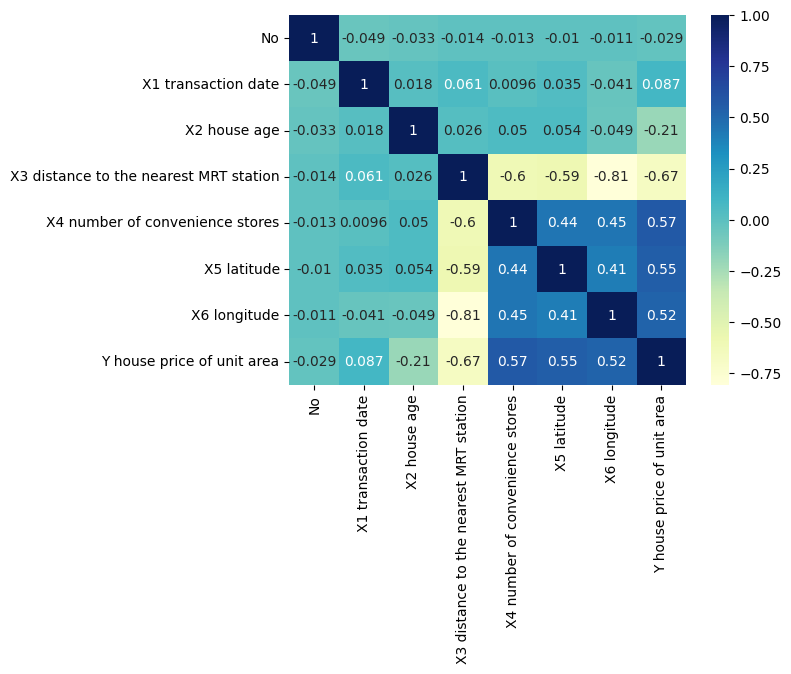

In [8]:
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

**Hint:** You can do more overview by yourself

# **📊 Exploratory Data Analysis (EDA)**

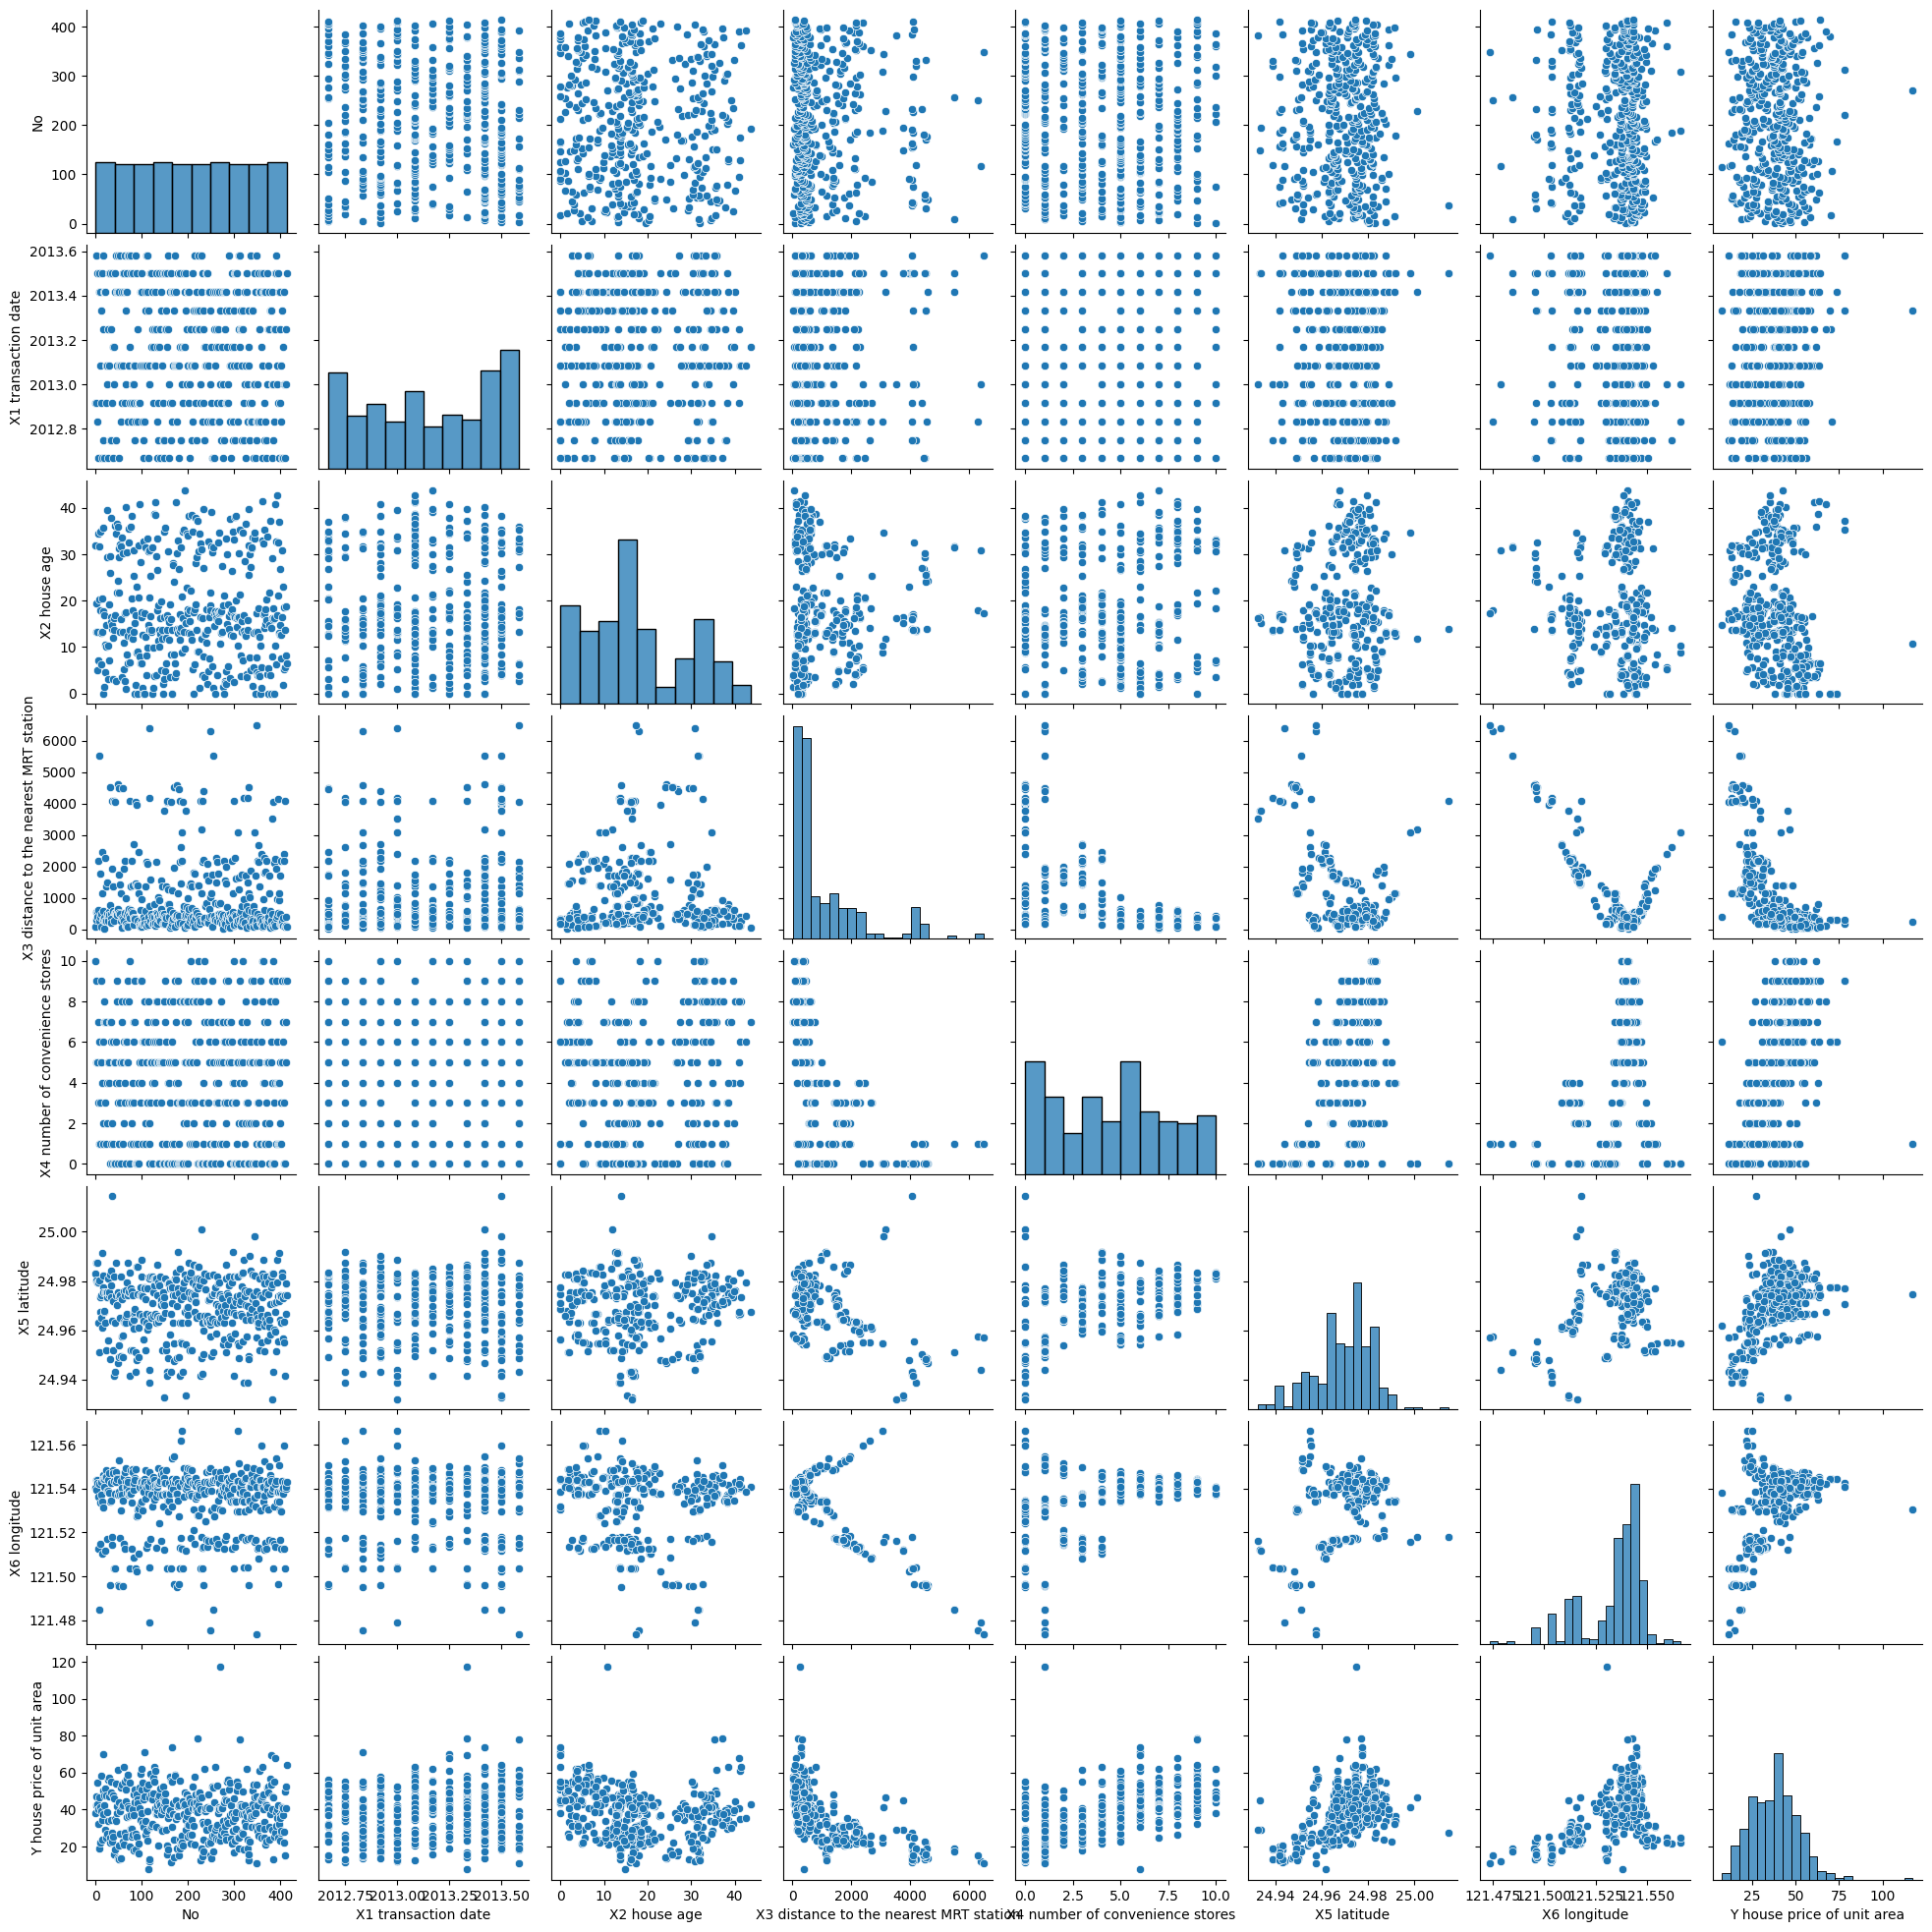

In [14]:
sns.pairplot(df)

## **Define X and y**

In [16]:
X=df.drop('Y house price of unit area', axis=1)

y=df['Y house price of unit area']

# **✔️ Preprocessing**

In [18]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)

In [19]:
poly_features=polynomial_converter.fit(X)

In [20]:
poly_features=polynomial_converter.transform(X)

In [21]:
poly_features.shape

(414, 35)

In [22]:
X.shape

(414, 7)

# **🧱 Train Test Split**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=101)

# **📈 Training a Polynomial Regression Model**

In [24]:
polymodel=LinearRegression()

In [25]:
polymodel.fit(X_train, y_train)

LinearRegression()

 # **✔️  Predicting Test Data**

In [26]:
y_pred=polymodel.predict(X_test)

In [27]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,19.2,16.682017,2.517983
347,11.2,5.055974,6.144026
307,24.7,20.453663,4.246337
299,46.1,47.809925,-1.709925
391,31.3,28.199328,3.100672


# **✔️ Evaluating the Model**

In [29]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)
RSquare =metrics.r2_score(y_test,y_pred)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly ,RSquare ],
             index=['MAE', 'MSE', 'RMSE', 'RSquare'], columns=['metrics'])

,metrics
MAE,4.465777
MSE,31.568270
RMSE,5.618565
RSquare,0.761526


# **✔️ Compare to the simple linear regression:**

In [32]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)
RSquare_simple =metrics.r2_score(ys_test,ys_pred)

In [34]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly, RSquare], 'Simple Metrics':[MAE_simple, MSE_simple,
                                                                                 RMSE_simple, RSquare_simple]}, index=['MAE', 'MSE', 'RMSE','RSquare_simple'])

,Poly Metrics,Simple Metrics
MAE,4.465777,5.373025
MSE,31.568270,45.880307
RMSE,5.618565,6.773500
RSquare_simple,0.761526,0.653410


# **✔️ Adjusting Model Parameters**

In [35]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):

    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)

    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)

    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)

    #Evaluating the Model

    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

    #Append the RMSE to the Train and Test List

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [36]:
pd.DataFrame({'Train RMSE List':train_RMSE_list})

,Train RMSE List
0,9.537107
1,8.051956
2,7.256683
3,6.164940
4,5.278492
5,5.352144
6,5.478648
7,5.863090
8,6.359515


In [37]:
pd.DataFrame({'Ttest RMSE List':test_RMSE_list})

,Ttest RMSE List
0,6.773500
1,5.618565
2,9.259449
3,70.291560
4,128.746977
5,515.811899
6,13183.112438
7,14129.941993
8,15105.823077


# **✔️ Plot the Polynomial degree VS RMSE**

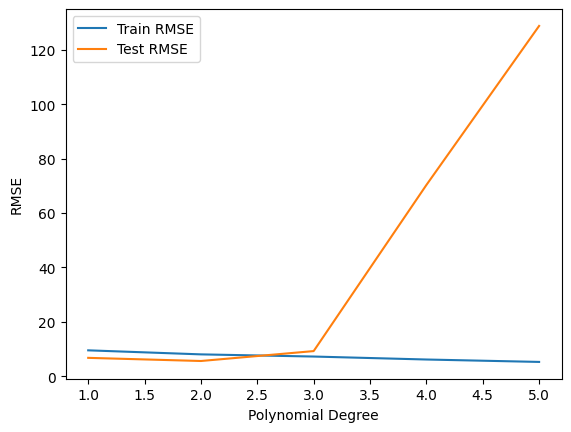

In [38]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()